### Description

**Training set**: 60,000 images

**Test set:** 10, 000 images
    
28*28 grayscale (784 pixel)


### 1. Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
train = pd.read_csv("Data/fashion-mnist_train.csv")
test = pd.read_csv("Data/fashion-mnist_test.csv")

In [13]:
test.head(1)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0


In [14]:
training = np.array(train, dtype = 'float32')
testing = np.array(test, dtype = 'float32')


## 2. Visualization


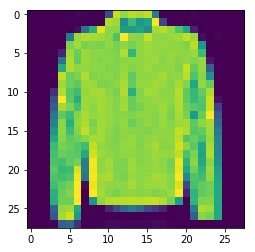

In [19]:
plt.imshow(training[8,1:].reshape(28,28))

0.0


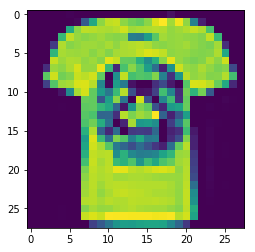

In [38]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,0]
print(label)

In [24]:
# 10 classes decoding as below

# 1. T-shirt
# 2. Trouser
# 3. Pullover
# 4. Coat
# 5. Sandal
# 6. Shirt
# 7. sneaker
# 8. Back
# 9. Ankle boot



3.0

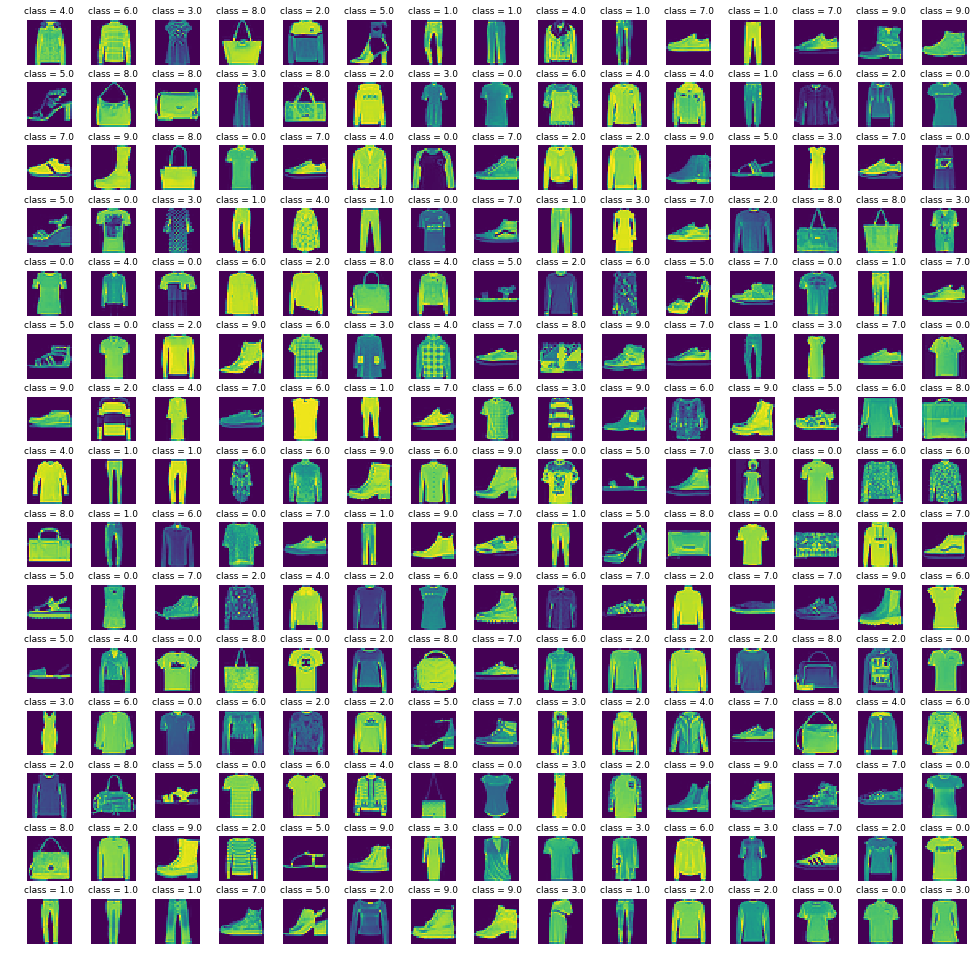

In [93]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17, 17))
axes = axes.ravel() # flaten the 15 * 15 matrix into 225 array

n_training = len(training)

for i in np.arange(0, W_grid * L_grid): # create evenly space variables
    index = np.random.randint(0, n_training)
    axes[i].imshow( training[index, 1:].reshape((28, 28)) )
    axes[i].set_title("class = {:0.1f}".format(training[index, 0]), fontsize = 9)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)


## 3. Training the Model

In [50]:
# Feature scaling
X_train = training[:, 1:]/255
y_train = training[:, 0]
X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [61]:
# Reshaping to be suitable for convolution

X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))


In [67]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [69]:
cnn = Sequential()

In [71]:
# Convolution 1
cnn.add(Conv2D(32, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))

/Users/jongwoopark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [72]:
# Max Pooling
cnn.add(MaxPooling2D(pool_size = (2,2)))

In [73]:
# Flatten
cnn.add(Flatten())

In [74]:
# Full connection - specify dimension
cnn.add(Dense(output_dim = 32, activation = 'relu'))

/Users/jongwoopark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  


In [75]:
# Output - 10 classification
cnn.add(Dense(output_dim = 10, activation = 'sigmoid'))

/Users/jongwoopark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [76]:
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr=0.001), metrics = ['accuracy'] )

In [78]:
epochs = 50
cnn.fit(X_train, y_train, epochs = epochs, validation_data = (X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 14s 298us/step - loss: 0.5034 - accuracy: 0.8218 - val_loss: 0.3623 - val_accuracy: 0.8714
Epoch 2/50
48000/48000 [==============================] - 15s 304us/step - loss: 0.3358 - accuracy: 0.8811 - val_loss: 0.3296 - val_accuracy: 0.8827
Epoch 3/50
48000/48000 [==============================] - 15s 313us/step - loss: 0.2898 - accuracy: 0.8980 - val_loss: 0.2778 - val_accuracy: 0.9038
Epoch 4/50
48000/48000 [==============================] - 16s 324us/step - loss: 0.2603 - accuracy: 0.9070 - val_loss: 0.2765 - val_accuracy: 0.9037
Epoch 5/50
48000/48000 [==============================] - 16s 334us/step - loss: 0.2381 - accuracy: 0.9142 - val_loss: 0.2767 - val_accuracy: 0.9022
Epoch 6/50
48000/48000 [==============================] - 16s 324us/step - loss: 0.2175 - accuracy: 0.9218 - val_loss: 0.2542 - val_accuracy: 0.9110
Epoch 7/50
48000/48000 [==============================] 

### 4. Evaluating the model

In [79]:
evaluation = cnn.evaluate(X_test, y_test)
print('Test Accuracy: {:3f}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 83us/step
Test Accuracy: 0.907900


In [92]:
predicted_classes = cnn.predict_classes(X_test)

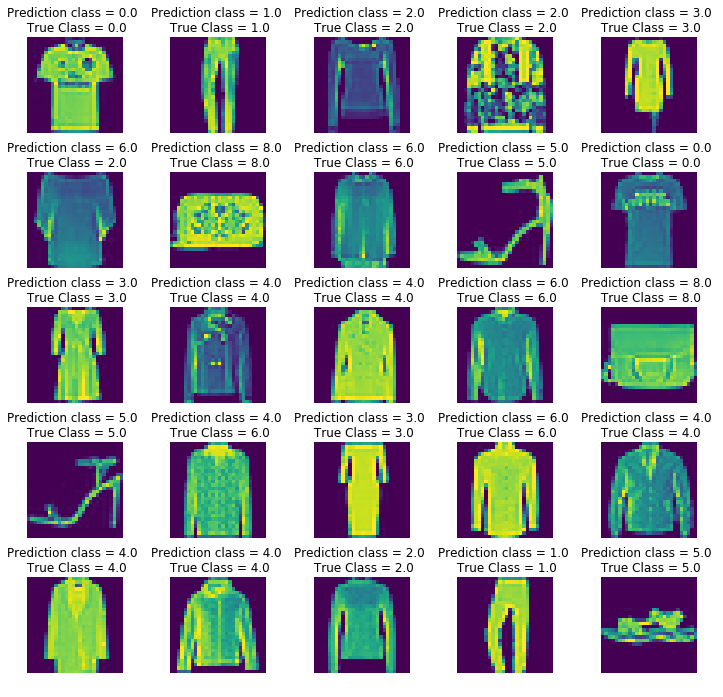

In [108]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction class = {:0.1f} \n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.5)

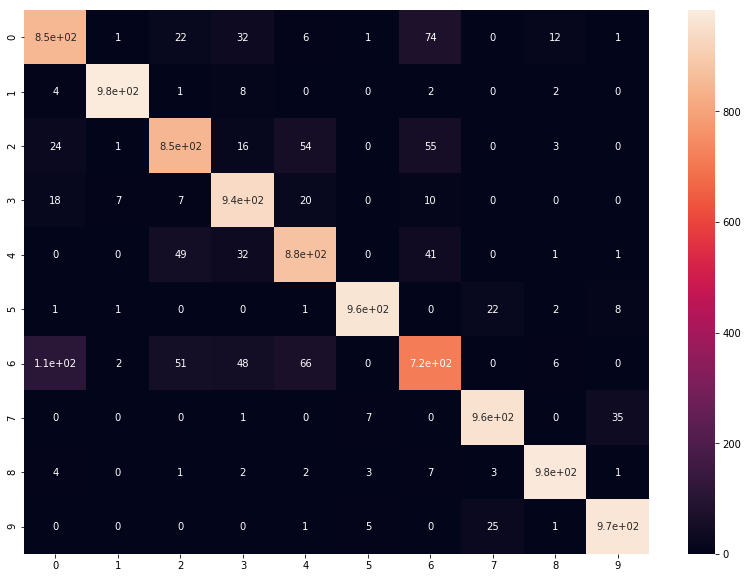

In [109]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14, 10))
sns.heatmap(cm, annot = True)

In [122]:
from sklearn.metrics import classification_report

num_classes = 10
target_name = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_name))

              precision    recall  f1-score   support

     Class 0       0.84      0.85      0.85      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.87      0.85      0.86      1000
     Class 3       0.87      0.94      0.90      1000
     Class 4       0.85      0.88      0.86      1000
     Class 5       0.98      0.96      0.97      1000
     Class 6       0.79      0.72      0.75      1000
     Class 7       0.95      0.96      0.95      1000
     Class 8       0.97      0.98      0.98      1000
     Class 9       0.95      0.97      0.96      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
# 10 classes decoding as below

# 1. T-shirt
# 2. Trouser
# 3. Pullover
# 4. Coat
# 5. Sandal
# 6. Shirt
# 7. sneaker
# 8. Back
# 9. Ankle boot